In [4]:
import pickle
from pandas import read_csv

with open('/home/ec2-user/eecs442/bounding-box.pickle', 'rb') as f: p2bb = pickle.load(f)
new_tagged = [p for _,p,_ in read_csv('/home/ec2-user/eecs442/train.csv').to_records()]
new_submit = [p for _,p,_ in read_csv('/home/ec2-user/eecs442/sample_submission.csv').to_records()]
p2bb[new_tagged[0]]

(185, 199, 853, 450)

In [43]:
import cv2
from PIL import Image as pil_image
from PIL.ImageDraw import Draw
from IPython.display import display
from tqdm import tqdm, tqdm_notebook

In [44]:
def crop_image(p, path):
    x0,y0,x1,y1 = p2bb[p]
    img = pil_image.open(path + p)
    crop_img = img.crop((x0, y0, x1, y1))
#     display(img)
#     display(crop_img)
    return crop_img

In [45]:
for train in tqdm_notebook(new_tagged):
    ci = crop_image(train, '/home/ec2-user/eecs442/train/')
    ci.save('/home/ec2-user/eecs442/crop_train/'+train)

In [46]:
for test in tqdm_notebook(new_submit):
    ci = crop_image(test, '/home/ec2-user/eecs442/test/')
    ci.save('/home/ec2-user/eecs442/crop_test/'+test)

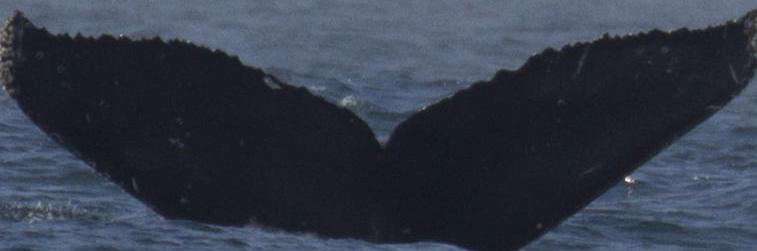

In [49]:
img = pil_image.open('/home/ec2-user/eecs442/crop_test/9903abe74.jpg')
display(img)